In [3]:
# Stable Diffusion 설치
!pip install -qq diffusers==0.31

In [4]:
# 메모리 삭제
import torch
torch.cuda.empty_cache()

import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:64"

In [5]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image 
import cv2
from PIL import Image 
import numpy as np
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so
/opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 113
CUDA SETUP: Loading binary /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so...


/opt/conda/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('tcp'), Posix

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5 from PIL import Image                                                                       │
│    6 import numpy as np                                                                          │
│    7 from diffusers.utils import load_image                                                      │
│ ❱  8 from controlnet_aux import OpenposeDetector                                                 │
│    9 from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistep    │
│   10                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'controlnet_aux'

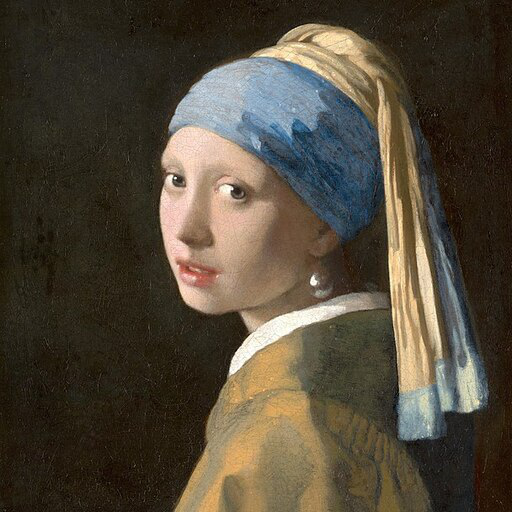

In [4]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image 

# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

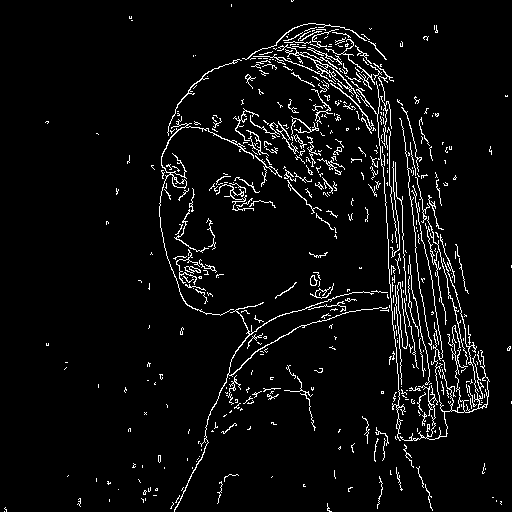

In [5]:
import cv2
from PIL import Image 
import numpy as np

# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

# threshold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다. 
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

In [6]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

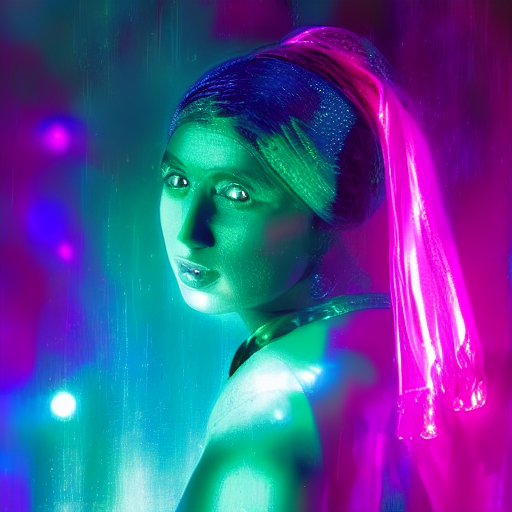

In [7]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights", 
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

  0%|          | 0/15 [00:00<?, ?it/s]

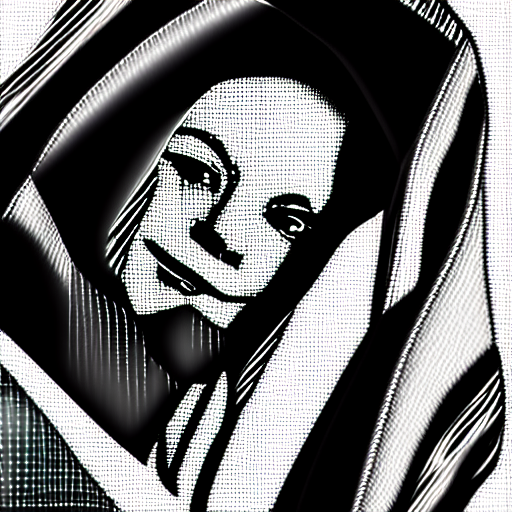

In [29]:
# Q. 프롬프트를 작성하고 하이퍼파라미터를 조절하여 이미지를 생성해 보세요. 

from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="hischool student gazing outside", 
    num_inference_steps=15, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny4_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

### 인체 자세 감지

In [11]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

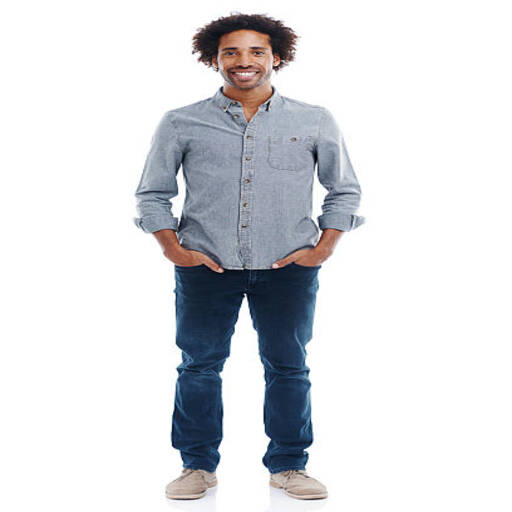

In [12]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

cuda


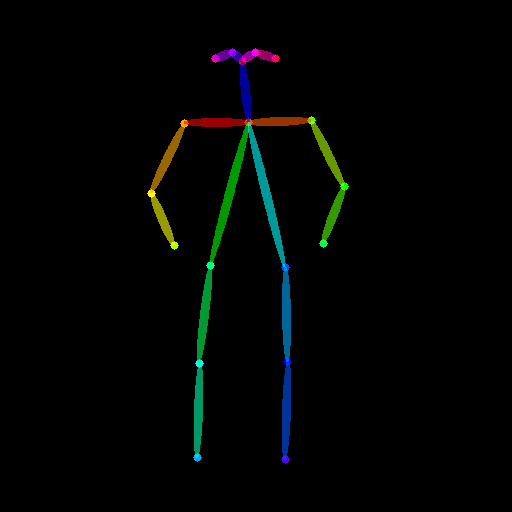

In [13]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [14]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

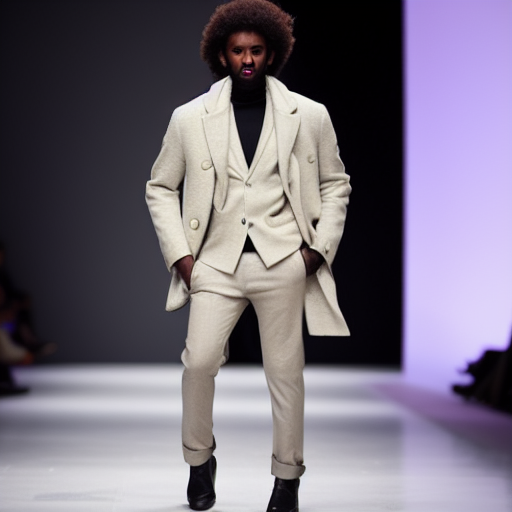

In [15]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(0)

#프롬프트를 작성합니다. 
prompt = "fashion model with stage light"
negative_prompt = "superman in the dark garage"
images = openpose_image


# 이미지를 생성합니다. 
openpose_image1 = openpose_pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    num_inference_steps=20, 
    generator=generator, 
    image=openpose_image
).images[0]

# 생성된 이미지를 출력합니다. 
openpose_image1

  0%|          | 0/20 [00:00<?, ?it/s]

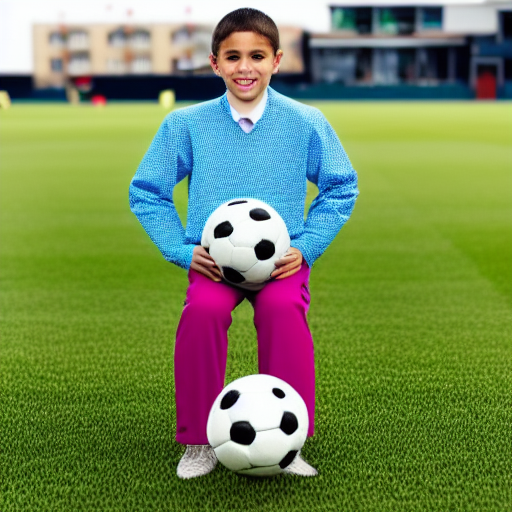

In [16]:
# Q. 프롬프트를 작성하고 하이퍼파라미터를 조절하여 이미지를 생성해 보세요.

prompt = "soccer in the grass"
negative_prompt = "dark forest"
images = openpose_image


# 이미지를 생성합니다. 
openpose_image2 = openpose_pipe(
    prompt=prompt, 
    negative_prompt=negative_prompt,
    num_inference_steps=20, 
    generator=generator, 
    image=openpose_image
).images[0]

# 생성된 이미지를 출력합니다. 
openpose_image2

### 윤곽선 검출 + 인체 자세 감지

##### Canny 알고리즘을 사용한 윤곽선 검출

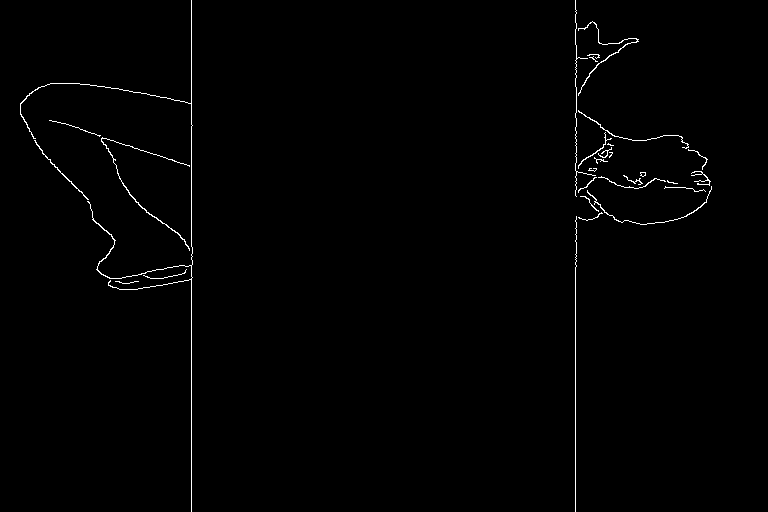

In [19]:
from diffusers.utils import load_image 
from PIL import Image
import cv2
import numpy as np
from diffusers.utils import load_image

# Q. 코드를 작성해 보세요.
# 이미지를 불러오세요. 
canny_image = Image.open("/aiffel/aiffel/diffusers/yuna_spin.jpg", mode = 'r')
canny_image = canny_image.resize((768, 512)) 
canny_image

#threshhold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다. 
canny_image = np.array(canny_image)


# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다. 
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다. 
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold) # (H, W)
canny_image = canny_image[:, :, None]  # (H, W, 1)
canny_image = np.concatenate([canny_image]*3, axis=2) # (H, W, 3) → RGB로 변환
canny_image = Image.fromarray(canny_image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

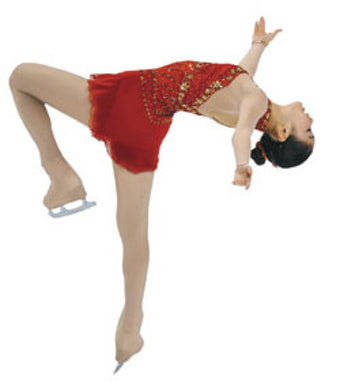

In [6]:
# 원본 이미지 불러오기
image_yuna = load_image(
    "/aiffel/aiffel/diffusers/yuna_spin.jpg"
)

image_yuna

##### Openpose를 사용한 인체 자세 검출

cuda


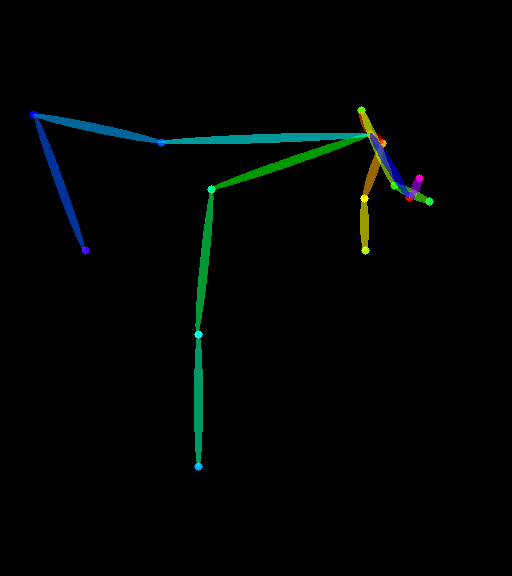

In [20]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image 

# Q. 아래의 코드를 작성해 주세요.
# 이미지를 불러옵니다. 
openpose_image = Image.open("/aiffel/aiffel/diffusers/yuna_spin.jpg", mode = 'r')

# OpenposeDetector를 사용하여 인체 자세를 검출합니다. 
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)
openpose_image

In [18]:
# from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler  

# # Load controlnet models
# canny_controlnet = ControlNetModel.from_pretrained(
#     "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
# )

# openpose_controlnet = ControlNetModel.from_pretrained(
#     "lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16
# )

# # Q. 코드를 작성해 보세요.
# # Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다. 
# controlnets = [canny_controlnet, openpose_controlnet]

# # 리스트 controlnets를 파이프라인으로 전달합니다. 
# pipe = StableDiffusionControlNetPipeline.from_pretrained(
#     "runwayml/stable-diffusion-v1-5",
#     controlnet=controlnets,
#     torch_dtype=torch.float16
# )

# pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# pipe = pipe.to("cuda")

# openpose_image = openpose_image.resize((768, 512))
# canny_image = canny_image.resize((768, 512))

# # 프롬프트를 작성합니다. 
# prompt = "a stylish woman dancing on stage with dynamic lighting"
# negative_prompt = "low resolution, blurry, dark background, watermark"

# # seed를 지정합니다. 
# generator = torch.manual_seed(0)

# images = [openpose_image, canny_image]

# # 이미지를 생성합니다. 
# image = pipe(
#     prompt=prompt, 
#     negative_prompt=negative_prompt,
#     num_inference_steps=10, 
#     generator=generator, 
#     image=images
# ).images[0]

# # 생성된 이미지를 저장합니다.
# image.save("aiffel/aiffel/multi_controlnet_output.png")

# # 생성된 이미지를 출력합니다.  
# image

- 메모리 이슈 발생하여 코드 수정

> - 메모리 최적화 추가
>   - pipe.enable_model_cpu_offload()

> - Resize images : 768x512 -> 512x512
>   - openpose_image = openpose_image.resize((512, 512))
>   - canny_image = canny_image.resize((512, 512))

> - num_inference_steps 수정
>   - num_inference_steps=20 -> num_inference_steps=10

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/10 [00:00<?, ?it/s]

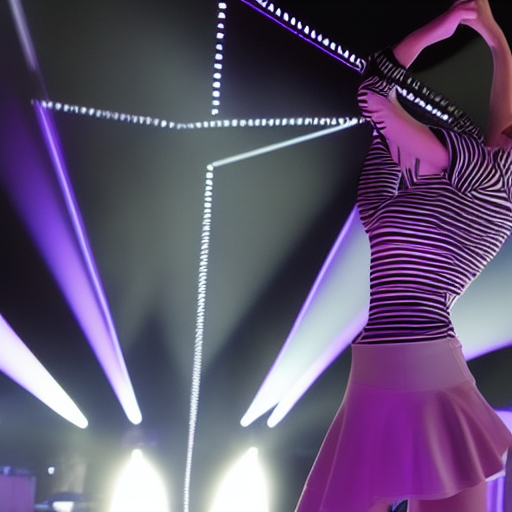

In [21]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:64"

from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

# Load ControlNet models
canny_controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)
openpose_controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16
)

controlnets = [canny_controlnet, openpose_controlnet]

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets,
    torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()  # 메모리 최적화

# Resize images to 512x512
openpose_image = openpose_image.resize((512, 512))
canny_image = canny_image.resize((512, 512))

prompt = "a stylish woman dancing on stage with dynamic lighting"
negative_prompt = "low resolution, blurry, dark background, watermark"
generator = torch.manual_seed(0)
images = [openpose_image, canny_image]

# 이미지 생성
with torch.no_grad():
    image = pipe(
        prompt=prompt, 
        negative_prompt=negative_prompt,
        num_inference_steps=10, 
        generator=generator, 
        image=images
    ).images[0]

# image.save("aiffel/aiffel/multi_controlnet_output.png") 경로설정을 잘못하여 수정
image.save("../multi_controlnet_output.png")

image


In [22]:
print("생성한 이미지를 올린 곳은 인슷하입니다.")

생성한 이미지를 올린 곳은 인슷하입니다.


##### 회고
> 윤순천
> - ControlNet을 활용하면 특정 조건(포즈, 윤곽 등)을 통해 이미지 생성을 세밀하게 제어할 수 있다는 점을 배웠다. 특히 여러 ControlNet을 동시에 활용할 수 있다는 점이 인상적이었다.
> - 텍스트 프롬프트나 조건 이미지에 비해 출력 결과가 기대에 못 미치는 경우가 많아 아쉬웠다. 
> - 생성된 이미지들이 예상보다 기괴해서 당황스럽기도 했지만, 동시에 AI가 창의적인 방식으로 이미지를 구현한다는 점에서 놀라웠다. 기술의 발전 속도와 가능성에 대해 실감했다.
> - CUDA 메모리 부족 문제로 가장 힘들었다. 메모리 최적화, 이미지 사이즈 축소, num_inference_steps 축소해도 해결되지 않았는데, 3가지 미션을 나누어서 실행한 결과 끝까지 수행할 수 있었다.


> 김선
> - 그루 분들의 창의성이 돋보이는 작품들을 많이 볼 수 있어서 좋았다. 창의성도 필수 덕목이지만, 원하는 이미지를 만들기 위해 프롬프트를 잘 쓰고  파라미터도 잘 조절하는 게 중요한 것 같다. 